In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [3]:
stock_prices = pd.read_csv('jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])
stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [3]:
stock_1301 = stock_prices[stock_prices["SecuritiesCode"]==1301].reset_index(drop=True)
stock_1301

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,20211129_1301,2021-11-29,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,False,0.003793
1198,20211130_1301,2021-11-30,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,False,0.007558
1199,20211201_1301,2021-12-01,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,False,0.016706
1200,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689


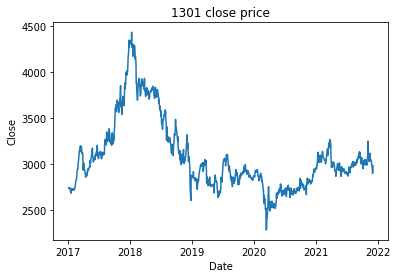

In [4]:
plt.figure()
plt.plot(stock_1301['Date'], stock_1301['Close'])
plt.title('1301 close price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

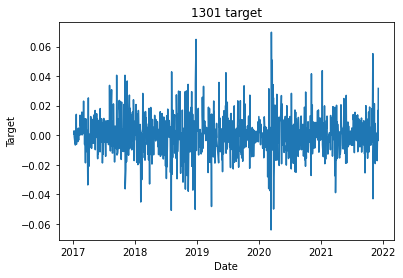

In [5]:
plt.figure()
plt.plot(stock_1301['Date'], stock_1301['Target'])
plt.title('1301 target')
plt.xlabel('Date')
plt.ylabel('Target')
plt.show()

In [3]:
stock_list = stock_prices['SecuritiesCode'].unique()
len(stock_list)

2000

In [5]:
stock_code = stock_prices.groupby("SecuritiesCode")
print(stock_code.size())

SecuritiesCode
1301    1202
1332    1202
1333    1202
1375     297
1376    1202
        ... 
9990    1202
9991    1202
9993    1202
9994    1202
9997    1202
Length: 2000, dtype: int64


In [11]:
for code in stock_list:
    tmp = stock_code.get_group(code)
    print(code)
    nullseries = tmp.isnull().sum()
    print(nullseries[nullseries > 0])
    print('='*20)
    # print(tmp)

1301
Open                   1
High                   1
Low                    1
Close                  1
ExpectedDividend    1197
dtype: int64
1332
Open                   1
High                   1
Low                    1
Close                  1
ExpectedDividend    1192
dtype: int64
1333
Open                   1
High                   1
Low                    1
Close                  1
ExpectedDividend    1197
dtype: int64
1376
Open                   1
High                   1
Low                    1
Close                  1
ExpectedDividend    1192
dtype: int64
1377
Open                   1
High                   1
Low                    1
Close                  1
ExpectedDividend    1192
dtype: int64
1379
Open                   1
High                   1
Low                    1
Close                  1
ExpectedDividend    1192
dtype: int64
1381
Open                   3
High                   3
Low                    3
Close                  3
ExpectedDividend    1193
dtype: int64

In [7]:
date_list = stock_prices['Date'].unique()
len(date_list)

1202

In [8]:
stock_date = stock_prices.groupby("Date")
print(stock_date.size())

# stock_date.plot()

Date
2017-01-04    1865
2017-01-05    1865
2017-01-06    1865
2017-01-10    1865
2017-01-11    1865
              ... 
2021-11-29    2000
2021-11-30    2000
2021-12-01    2000
2021-12-02    2000
2021-12-03    2000
Length: 1202, dtype: int64


In [9]:
tmp = stock_date.get_group(date_list[0])
tmp

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
1860,20170104_9990,2017-01-04,9990,1191.0,1233.0,1185.0,1223.0,58600,1.0,NaN,False,-0.022117
1861,20170104_9991,2017-01-04,9991,1117.0,1131.0,1115.0,1129.0,56100,1.0,NaN,False,0.000000
1862,20170104_9993,2017-01-04,9993,1756.0,1784.0,1756.0,1773.0,5300,1.0,NaN,False,0.015042
1863,20170104_9994,2017-01-04,9994,1716.0,1769.0,1716.0,1754.0,27400,1.0,NaN,False,-0.001132


In [10]:
tmp['Rank'] = tmp['Target'].rank(ascending=False, method='first') - 1
tmp

d:\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,898.0
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,325.0
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,567.0
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,364.0
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,20170104_9990,2017-01-04,9990,1191.0,1233.0,1185.0,1223.0,58600,1.0,NaN,False,-0.022117,1770.0
1861,20170104_9991,2017-01-04,9991,1117.0,1131.0,1115.0,1129.0,56100,1.0,NaN,False,0.000000,1015.0
1862,20170104_9993,2017-01-04,9993,1756.0,1784.0,1756.0,1773.0,5300,1.0,NaN,False,0.015042,253.0
1863,20170104_9994,2017-01-04,9994,1716.0,1769.0,1716.0,1754.0,27400,1.0,NaN,False,-0.001132,1060.0


In [11]:
stock_prices['Rank'] = 0
stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,0
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,0
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,0
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,0
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816,0
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478,0
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302,0
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098,0


In [9]:
rank_only = pd.DataFrame(columns=['Rank'])

for date_price in date_list:
    tmp = stock_date.get_group(date_price)
    tmp['Rank'] = tmp['Target'].rank(ascending=False, method='first') - 1
    rank_only = rank_only.append(tmp['Rank'].to_frame())
# print(rank_only)

stock_prices['Rank'] = rank_only['Rank']
stock_prices

d:\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,898.0
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,325.0
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,567.0
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,364.0
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816,580.0
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478,1119.0
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302,1941.0
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098,1768.0


In [10]:
feature_cols = ["Date", "SecuritiesCode", "Open", "High", "Low", "Close", "Volume", "Rank"]
df = stock_prices[feature_cols].copy()
df.to_csv('data_rank.csv')

0      -0.132932
1      -0.861399
2       0.241265
3      -0.558056
4       1.133582
          ...   
1197    0.192553
1198   -1.439302
1199    0.706244
1200    0.281121
1201   -0.462846
Name: Rank, Length: 1202, dtype: float64


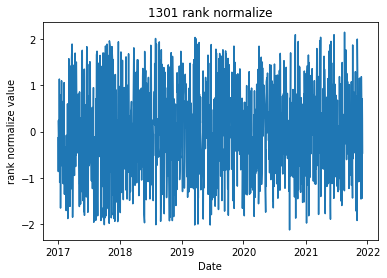

In [20]:
stock_1301 = stock_prices[stock_prices["SecuritiesCode"]==1301].reset_index(drop=True)
stock_1301_norm = (stock_1301['Rank'] - stock_1301['Rank'].mean()) / stock_1301['Rank'].std()
print(stock_1301_norm)
plt.figure()
plt.plot(stock_1301['Date'], stock_1301_norm)
plt.title('1301 rank normalize')
plt.xlabel('Date')
plt.ylabel('rank normalize value')
plt.show()

In [ ]:
stock_1301 = stock_prices[stock_prices["SecuritiesCode"]==1301].reset_index(drop=True)

plt.figure()
plt.plot(stock_1301['Date'], stock_1301['Rank'])
plt.title('1301 rank')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.show()

In [ ]:
target_count = stock_prices[["SecuritiesCode"]].copy().drop_duplicates(ignore_index=True)
target_count['Count'] = 0
target_count

,SecuritiesCode,Count
0,1301,0
1,1332,0
2,1333,0
3,1376,0
4,1377,0
...,...,...
1995,4167,0
1996,7358,0
1997,4168,0
1998,7342,0


In [ ]:
print(stock_prices.isnull().sum())

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64


In [ ]:
stock_prices2 = stock_prices.loc[stock_prices["Date"]>= "2021-10-01"].reset_index(drop=True)
stock_prices2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211001_1301,2021-10-01,1301,3010.0,3020.0,2986.0,2995.0,18700,1.0,NaN,False,-0.015677
1,20211001_1332,2021-10-01,1332,642.0,643.0,627.0,630.0,2175400,1.0,NaN,False,-0.025237
2,20211001_1333,2021-10-01,1333,2634.0,2634.0,2594.0,2609.0,159900,1.0,NaN,False,-0.015507
3,20211001_1375,2021-10-01,1375,1550.0,1550.0,1512.0,1528.0,236300,1.0,NaN,False,-0.004679
4,20211001_1376,2021-10-01,1376,1550.0,1550.0,1512.0,1512.0,5000,1.0,NaN,False,-0.057350
...,...,...,...,...,...,...,...,...,...,...,...,...
87995,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
87996,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
87997,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
87998,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [ ]:
print(stock_prices2.isnull().sum())

RowId                   0
Date                    0
SecuritiesCode          0
Open                  285
High                  285
Low                   285
Close                 285
Volume                  0
AdjustmentFactor        0
ExpectedDividend    87902
SupervisionFlag         0
Target                  0
dtype: int64


In [5]:
feature_cols = ["Date", "SecuritiesCode", "Open", "High", "Low", "Close", "Volume", "Target"]
df = stock_prices[feature_cols].copy()
df.to_csv('data.csv')

In [ ]:
import plotly.express as px
stocks = pd.read_csv("jpx-tokyo-stock-exchange-prediction/stock_list.csv")
# stocks["Section/Products"].value_counts()
fig = px.pie(stocks,names="Section/Products", title='Stock Indices')
fig.show()

In [ ]:
fig = px.pie(stocks,names="NewMarketSegment", title='Market Segment')
fig.show()

In [ ]:
fig = px.pie(stocks,names="33SectorName", title='Sector')
fig.show()

In [ ]:
sample_output = pd.read_csv('jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv')
sample_output[sample_output['Date'] == '2021-12-06']

,Date,SecuritiesCode,Rank
0,2021-12-06,1301,0
1,2021-12-06,1332,1
2,2021-12-06,1333,2
3,2021-12-06,1375,3
4,2021-12-06,1376,4
...,...,...,...
1995,2021-12-06,9990,1995
1996,2021-12-06,9991,1996
1997,2021-12-06,9993,1997
1998,2021-12-06,9994,1998
